***
# Lecture 3

## Example: Inverted pendulum

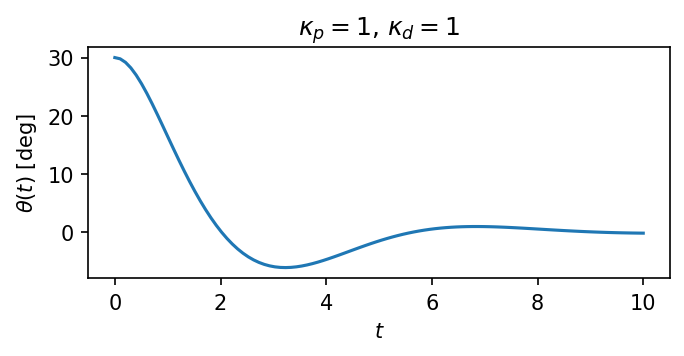

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

def f(x, t, kp, kd, g=9.81, m=1., l=1.):
    """Evaluate the closed-loop inverted pendulum dynamics."""
    
    # Construct the control input
    θ, dθ = x
    u = -m*(l**2)*(kp*θ + kd*dθ)
    u -= m*g*l*θ

    # Apply the control to the true dynamics
    ddθ = (g/l)*np.sin(θ) + u/(m*(l**2))
    dx = np.array([dθ, ddθ])
    return dx

θ0 = np.deg2rad(30.)
x0 = np.array([θ0, 0.])
T = 10.
kp, kd = 1., 1.

t = np.linspace(0, T, num=100)
x = odeint(f, x0, t, args=(kp, kd))
θ, dθ = x.T

fig, ax = plt.subplots(1, 1, figsize=(5, 2), dpi=150)
ax.plot(t, np.rad2deg(θ))
ax.set_title(r'$\kappa_p = $' + f'{kp:g}, ' + r'$\kappa_d = $' + f'{kd:g}')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\theta(t)$ [deg]')
plt.show()

***
# Lecture 4

## Simulation in Python via NumPy

In [10]:
import numpy as np

x = np.arange(10)
print(type(x))
print(x)
# <class 'numpy.ndarray'>
# [0 1 2 3 4 5 6 7 8 9]

x = x.reshape(2, 5)
print(x)
# [[0 1 2 3 4]
#  [5 6 7 8 9]]

x[1, ::2] = -42
print(x)
# [[  0   1   2   3   4]
#  [-42   6 -42   8 -42]]

print(np.sin(x))
# [[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025 ]
#  [ 0.91652155 -0.2794155   0.91652155  0.98935825  0.91652155]]

<class 'numpy.ndarray'>
[0 1 2 3 4 5 6 7 8 9]
[[0 1 2 3 4]
 [5 6 7 8 9]]
[[  0   1   2   3   4]
 [-42   6 -42   8 -42]]
[[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025 ]
 [ 0.91652155 -0.2794155   0.91652155  0.98935825  0.91652155]]


## Example: ODE integration "by hand"

In [21]:
import numpy as np

# Define an IVP, timestamps, and discretization step
f = lambda x, t: x * np.sin(t)**2
x0 = 1.
t0, tf = 0., 10.
dt = 0.5
t = np.arange(t0, tf + dt, dt)

# Compute true solution for comparison
x = {}
x['true'] = x0*np.exp(((t-t0) - np.sin(t-t0)*np.cos(t+t0))/2)

# Loop over timestamps and execute each integration scheme
methods = ('true', 'euler', 'midpoint', 'rk4')
for m in methods[1:]:
    x[m] = np.zeros_like(t)
    x[m][0] = x0

    for i in range(t.size - 1):
        if m == 'euler':
            x[m][i + 1] = x[m][i] + dt*f(x[m][i], t[i])
        
        elif m == 'midpoint':
            t_mid = t[i] + dt/2
            x_mid = x[m][i] + (dt/2)*f(x[m][i], t[i])
            x[m][i + 1] = x[m][i] + dt*f(x_mid, t_mid)
        
        elif m == 'rk4':
            k1 = f(x[m][i], t[i])
            k2 = f(x[m][i] + (dt/2)*k1, t[i] + dt/2)
            k3 = f(x[m][i] + (dt/2)*k2, t[i] + dt/2)
            k4 = f(x[m][i] + dt*k3, t[i] + dt)
            x[m][i + 1] = x[m][i] + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
        
        else:
            raise NotImplementedError()

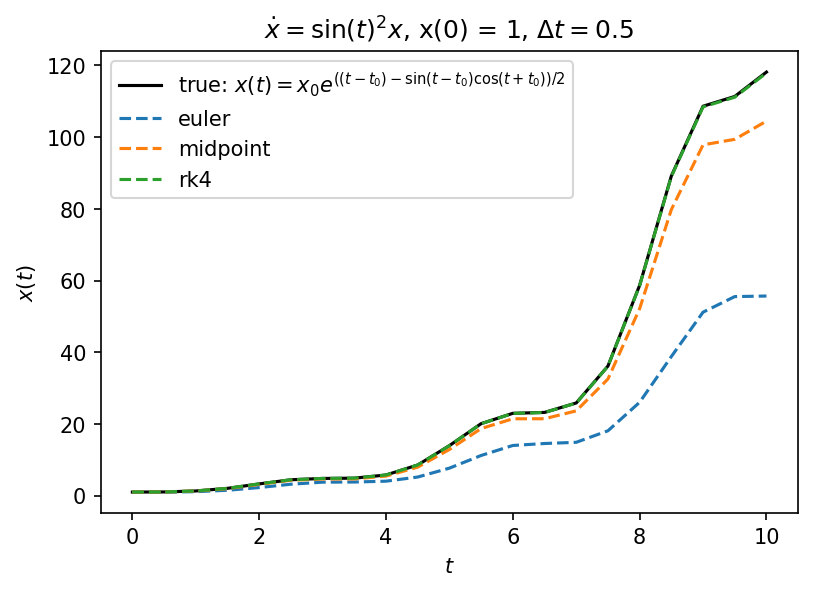

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=150)
ax.plot(t, x['true'], 'k', 
        label=r'true: $x(t) = x_0e^{((t-t_0) - \sin(t-t_0)\cos(t+t_0))/2}$')
for m in methods[1:]:
    ax.plot(t, x[m], '--', label=m)
ax.legend()
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x(t)$')
ax.set_title(r'$\dot{x} = \sin(t)^2x$, ' 
             + r'x(' + f'{t0:g}' + r') = ' + f'{x0:g}, '
             + r'$\Delta t = $' + f'{dt:g}')
plt.show()

## Example: Unicycle robot simulation

In [37]:
import numpy as np

def f(q, t, xd, yd):
    """Evaluate the state derivative of a unicycle in closed-loop."""
    x, y, θ = q
    
    # Set steering velocity proportional to how far the robot has to turn 
    # to face the goal point
    kω = 1.
    θd = np.arctan2(yd - y, xd - x)
    ω = -kω * (θ - θd)

    # Set forward velocity proportional to the distance from the goal point
    kv = 0.4
    v = kv * np.sqrt((x - xd)**2 + (y - yd)**2)
    
    dq = np.array([v*np.cos(θ), v*np.sin(θ), ω])
    return dq

In [24]:
from scipy.integrate import odeint

q0 = np.array([0., 0., 0.])
xd, yd = -0.3, 0.5
T = 15.

t = np.linspace(0, T, num=100)
q = odeint(f, q0, t, args=(xd, yd))
x, y, θ = q.T

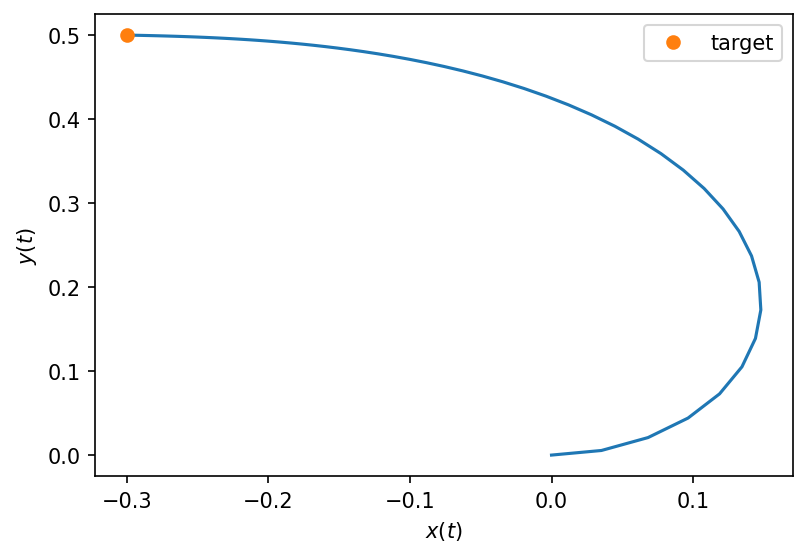

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=150)
ax.plot(x, y)
ax.plot(xd, yd, 'o', label='target')
ax.legend()
ax.set_xlabel(r'$x(t)$')
ax.set_ylabel(r'$y(t)$')
plt.show()

## Auto-differentiation in Python via JAX

In [36]:
import jax
import jax.numpy as jnp

def f(x):
    return jnp.sum(x**2)/2   # identical to NumPy syntax!

grad_f = jax.grad(f)         # compute the gradient function
x = jnp.array([0., 1., 2.])  # use JAX arrays! 

print('x:        ', x)
print('f(x):     ', f(x))
print('grad_f(x):', grad_f(x))
# x:         [0. 1. 2.]
# f(x):      2.5
# grad_f(x): [0. 1. 2.]

x:         [0. 1. 2.]
f(x):      2.5
grad_f(x): [0. 1. 2.]


## Example: Jacobians of unicycle dynamics

In [35]:
import jax
import jax.numpy as jnp

def f(q, u):
    """Evaluate the unicycle dynamics."""
    x, y, θ = q
    v, ω = u    
    dq = jnp.array([v*jnp.cos(θ), v*jnp.sin(θ), ω])
    return dq

# Linearize around zero heading, zero steering rate,
# and a non-zero forward velocity
df = jax.jacobian(f, argnums=(0, 1))  # get Jacobian function `df`
q = jnp.array([0., 0., 0.])
u = jnp.array([1., 0.])                 
A, B = df(q, u)

print(A)
# [[0. 0. 0.]
#  [0. 0. 1.]
#  [0. 0. 0.]]

print(B)
# [[1. 0.]
#  [0. 0.]
#  [0. 1.]]

[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
[[1. 0.]
 [0. 0.]
 [0. 1.]]
